In [1]:
import os

In [2]:
import glob

In [3]:
from IPython.display import Image, display

In [4]:
!nvidia-smi

Sat Dec  9 06:58:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
pip install ultralytics==8.0.0

  Using cached ultralytics-8.0.0-py3-none-any.whl (219 kB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uninstalled ultralytics-8.0.196


In [6]:
import ultralytics

In [7]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.7/78.2 GB disk)


In [8]:
HOME = "/content/"

In [9]:
print(HOME)

/content/


In [10]:
!mkdir {HOME}/datasets

mkdir: cannot create directory ‘/content//datasets’: File exists


In [11]:
%cd {HOME}/datasets

/content/datasets


In [13]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="sRZFgPn7f9rMLPTIU8Rq")
project = rf.workspace("intel-unnati-training-program").project("pothole-detection-bqu6s")
dataset = project.version(9).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.0, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Pothole-Detection--9 in yolov8:: 100%|██████████| 7552/7552 [00:02<00:00, 2873.82it/s]


In [ ]:
pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.0
    Uninstalling ultralytics-8.0.0:
      Successfully uninstalled ultralytics-8.0.0


In [14]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data='/content/datasets/Pothole_Detection/data.yaml' epochs=10 imgsz=640

/content
100% 21.5M/21.5M [00:00<00:00, 247MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Pothole_Detection/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentu

In [ ]:
!ls '/content/runs/detect/train2'

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1701605925.964093175d71.2718.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch8580.jpg  weights
P_curve.png					    train_batch8581.jpg
PR_curve.png					    train_batch8582.jpg


In [ ]:
from IPython.display import Image, display

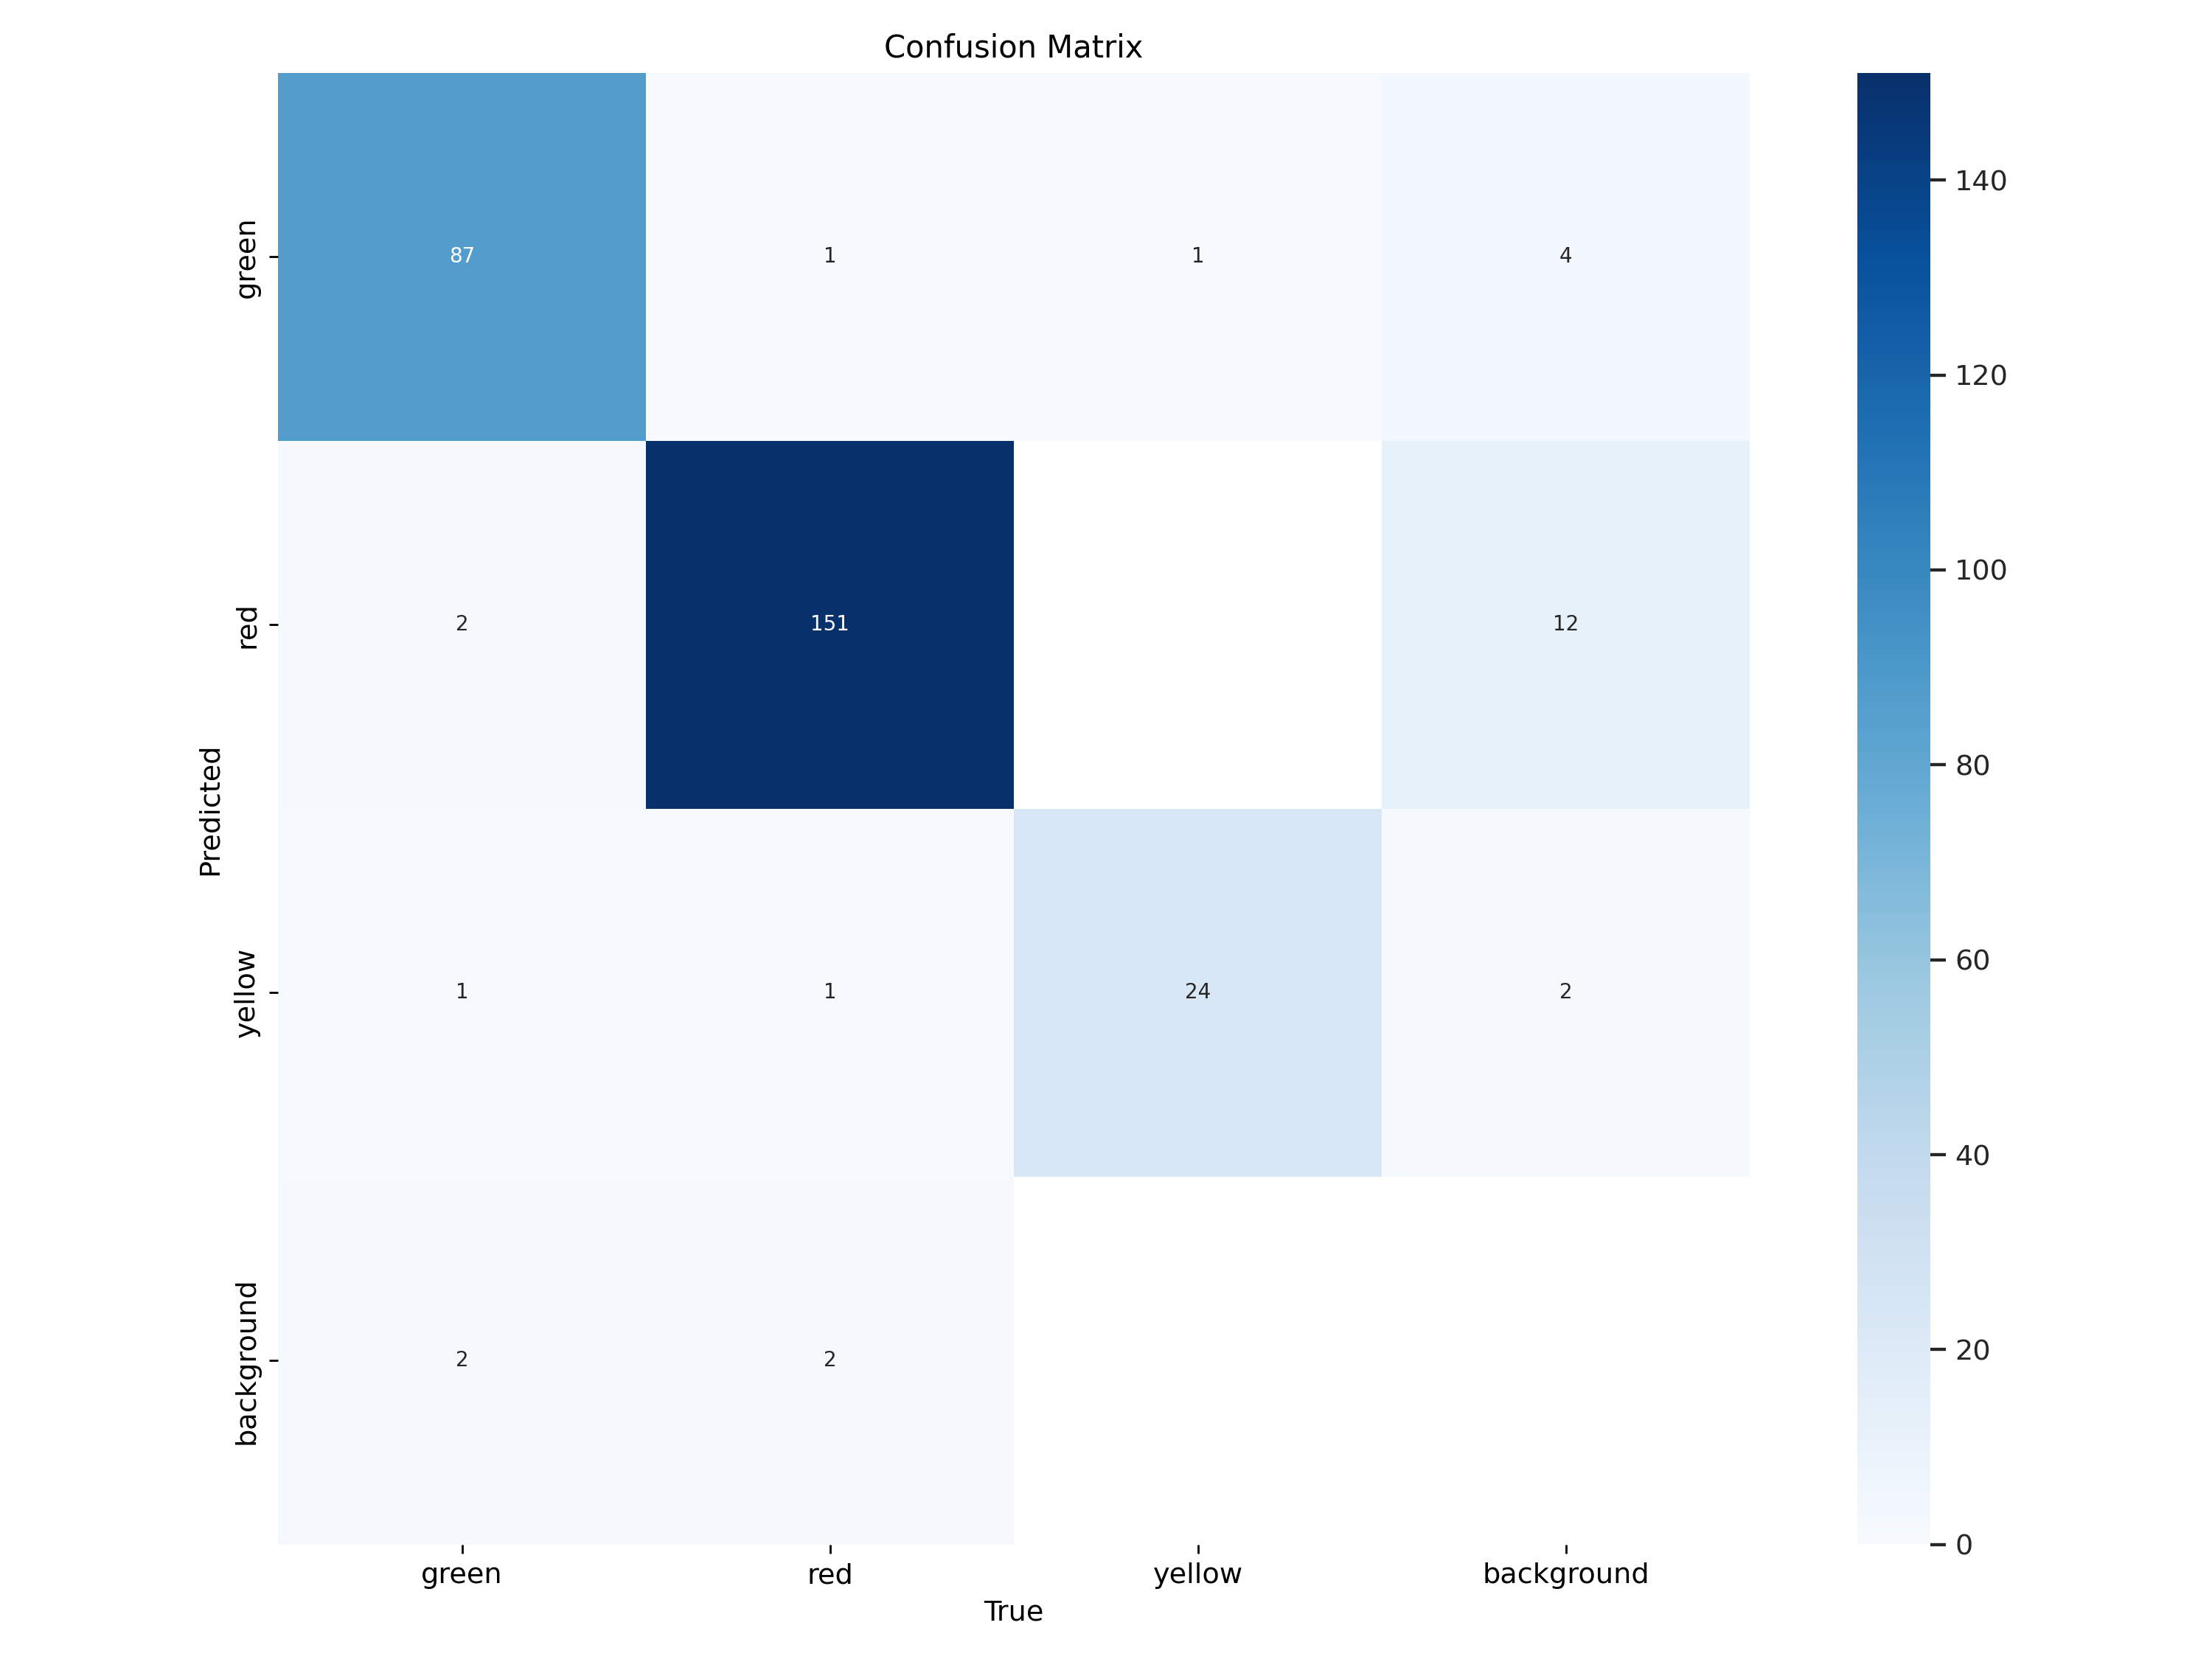

In [ ]:
Image(filename = f"/content/runs/detect/train2/confusion_matrix.png")

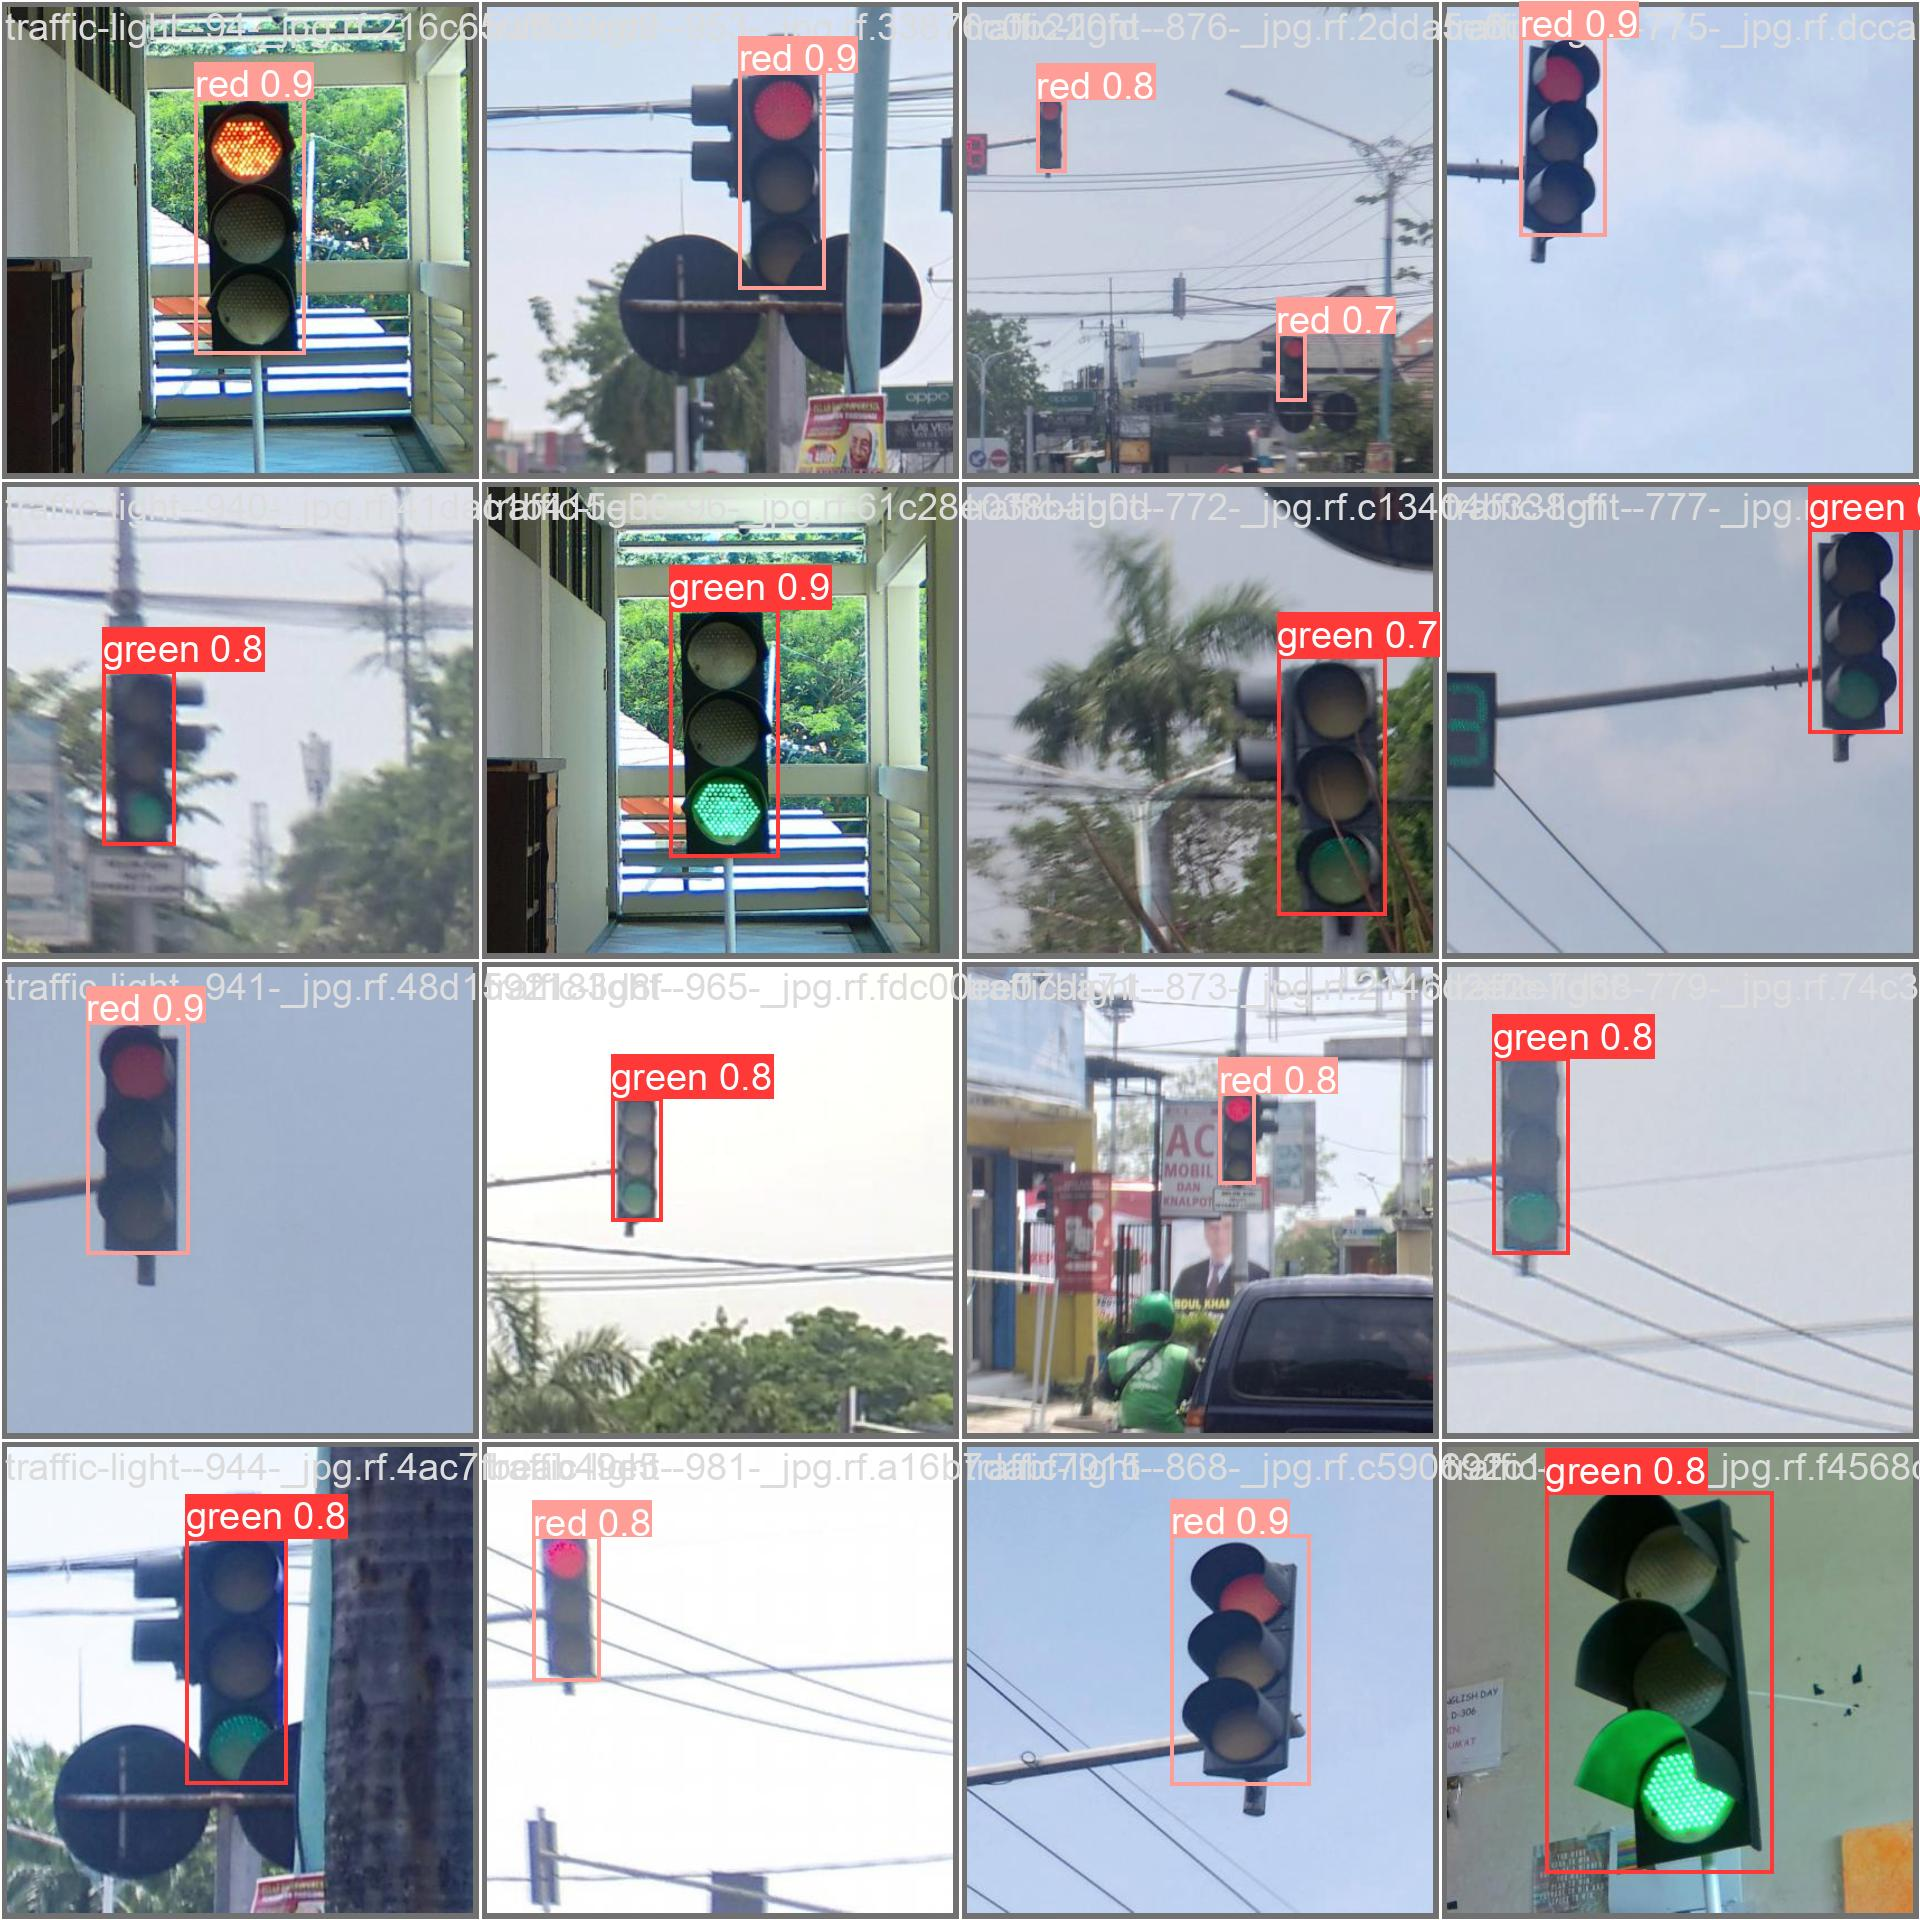

In [ ]:
Image(filename = f"/content/runs/detect/train2/val_batch2_pred.jpg", height = 500)

In [ ]:
!yolo task=detect mode=val model='/content/runs/detect/train2/weights/best.pt' data='/content/datasets/cinTA_v2/data.yaml'


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/cinTA_v2/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:08<00:00,  1.45it/s]
                   all        200        272      0.962      0.955      0.985      0.587
                 green        200         92      0.981      0.913      0.973      0.606
                   red        200        155      0.987      0.951      0.993      0.574
                yellow        200         25      0.918          1      0.989       0.58
Speed: 7.8ms preprocess, 21.6ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' conf=0.25 source='Light.mp4'

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/866) /content/Light.mp4: 576x1024 1 green, 2 reds, 2 yellows, 117.0ms
video 1/1 (2/866) /content/Light.mp4: 576x1024 1 green, 2 reds, 2 yellows, 20.1ms
video 1/1 (3/866) /content/Light.mp4: 576x1024 1 green, 2 reds, 2 yellows, 20.0ms
video 1/1 (4/866) /content/Light.mp4: 576x1024 1 green, 2 reds, 2 yellows, 20.0ms
video 1/1 (5/866) /content/Light.mp4: 576x1024 1 green, 2 reds, 2 yellows, 20.0ms
video 1/1 (6/866) /content/Light.mp4: 576x1024 1 green, 2 reds, 2 yellows, 20.0ms
video 1/1 (7/866) /content/Light.mp4: 576x1024 1 green, 2 reds, 2 yellows, 20.0ms
video 1/1 (8/866) /content/Light.mp4: 576x1024 1 green, 2 reds, 2 yellows, 20.0ms
video 1/1 (9/866) /content/Light.mp4: 576x1024 1 green, 2 reds, 2 yellows, 13.7ms
video 1/1 (10/866) /content/Light.mp4: 576x1024 1 green, 2 reds, 2 yellows, 13.7ms

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' conf=0.25 source='Traffic.mp4'

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/1148) /content/Traffic.mp4: 576x1024 1 green, 115.0ms
video 1/1 (2/1148) /content/Traffic.mp4: 576x1024 1 green, 20.2ms
video 1/1 (3/1148) /content/Traffic.mp4: 576x1024 1 green, 20.1ms
video 1/1 (4/1148) /content/Traffic.mp4: 576x1024 1 green, 20.1ms
video 1/1 (5/1148) /content/Traffic.mp4: 576x1024 1 green, 20.2ms
video 1/1 (6/1148) /content/Traffic.mp4: 576x1024 1 green, 20.1ms
video 1/1 (7/1148) /content/Traffic.mp4: 576x1024 1 green, 20.1ms
video 1/1 (8/1148) /content/Traffic.mp4: 576x1024 1 green, 20.1ms
video 1/1 (9/1148) /content/Traffic.mp4: 576x1024 1 green, 20.1ms
video 1/1 (10/1148) /content/Traffic.mp4: 576x1024 1 green, 20.1ms
video 1/1 (11/1148) /content/Traffic.mp4: 576x1024 1 green, 20.2ms
video 1/1 (12/1148) /content/Traffic.mp4: 576x1024 1 green, 20.2ms
video 1/1 (13/1148) /cont

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' conf=0.25 source='traff7.jpg'

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/traff7.jpg: 576x1024 (no detections), 141.4ms
Speed: 15.9ms preprocess, 141.4ms inference, 21.4ms postprocess per image at shape (1, 3, 576, 1024)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' conf=0.25 source='traff1.jpg'

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/traff1.jpg: 704x1024 1 red, 88.2ms
Speed: 8.2ms preprocess, 88.2ms inference, 125.0ms postprocess per image at shape (1, 3, 704, 1024)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' conf=0.25 source='bad weather.jpg'

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/bad weather.jpg: 608x1024 4 reds, 129.1ms
Speed: 6.5ms preprocess, 129.1ms inference, 91.0ms postprocess per image at shape (1, 3, 608, 1024)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' conf=0.25 source='far green.jpg'

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/far green.jpg: 576x1024 1 green, 218.3ms
Speed: 14.6ms preprocess, 218.3ms inference, 159.1ms postprocess per image at shape (1, 3, 576, 1024)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' conf=0.25 source='-bad-weather-conditions-poor-visibility.jpg'

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/-bad-weather-conditions-poor-visibility.jpg: 704x1024 1 red, 110.5ms
Speed: 8.5ms preprocess, 110.5ms inference, 119.1ms postprocess per image at shape (1, 3, 704, 1024)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' conf=0.25 source='foggy-traffic.png'

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/foggy-traffic.png: 1024x704 1 red, 115.8ms
Speed: 9.6ms preprocess, 115.8ms inference, 133.9ms postprocess per image at shape (1, 3, 1024, 704)
Results saved to runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' conf=0.25 source='rainy-weather-conditions.png'

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/rainy-weather-conditions.png: 640x1024 (no detections), 131.1ms
Speed: 6.8ms preprocess, 131.1ms inference, 28.2ms postprocess per image at shape (1, 3, 640, 1024)
Results saved to runs/detect/predict9
💡 Learn more at https://docs.ultralytics.com/modes/predict
